In [9]:
import numpy as np
from spectral import envi
import matplotlib.pyplot as plt

In [11]:
# Load the hyperspectral image
img = envi.open('AVIS data/bioscape_v02_34_11_rfl.hdr', 'AVIS data/bioscape_v02_34_11_rfl')
print(img.shape, img.bands.centers[0], img.bands.centers[-1])

(2000, 2000, 425) 377.1956495 2500.8756495000002


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0047564944..2.7643323].


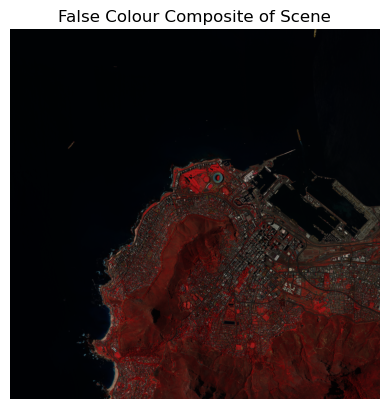

In [13]:
# Build a false-colour composite
rgb = img.read_band(100), img.read_band(50), img.read_band(30)
plt.imshow(np.dstack(rgb))
plt.title('False Colour Composite of Scene')
plt.axis('off')
plt.show()

In [ ]:
# Defining the Table Mountain ROI
import rasterio
from rasterio.mask import mask
import fiona

with fiona.open('Table Mountain/Table Mountain National Park.shp', 'r') as shp:
    polygons = [feature['geometry'] for feature in shp]

with rasterio.open('AVIS data/bioscape_v02_34_11_rfl') as src:
    clipped, out_transform = mask(src, polygons, crop=True)